In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as statss
from scipy import stats

In [3]:
prices=pd.read_csv("./Data_Set/wine_sales_data.csv")


In [4]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [5]:
prices.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [6]:
prices["quality_label"]=prices["points"].apply(lambda value:"low" if value <87 else "medium"
if value <=92 else "high" )
prices.head(5)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,quality_label
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,high
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,high
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,high
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,high
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,high


In [7]:
prices.isnull().sum()

Unnamed: 0           0
country              5
description          0
designation      45735
points               0
price            13695
province             5
region_1         25060
region_2         89977
variety              0
winery               0
quality_label        0
dtype: int64

In [8]:
prices.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [9]:
prices.replace(to_replace="Portuguese Table Wine Total",value="Portugal",inplace=True)

In [10]:
prices_P=prices[prices["country"]=="Portugal"]

In [11]:
prices.drop(prices.index[prices["country"]=="US"],inplace=True)
prices.drop(prices.index[prices["country"]=="Australia"],inplace=True)
prices.drop(prices.index[prices["country"]=="Argentina"],inplace=True)
prices.drop(prices.index[prices["country"]=="Chile"],inplace=True)
prices.drop(prices.index[prices["country"]=="South Africa"],inplace=True)
prices.drop(prices.index[prices["country"]=="Israel"],inplace=True)
prices.drop(prices.index[prices["country"]=="New Zealand"],inplace=True)
prices.drop(prices.index[prices["country"]=="Canada"],inplace=True)
prices.drop(prices.index[prices["country"]=="Turkey"],inplace=True)
prices.drop(prices.index[prices["country"]=="Mexico"],inplace=True)
prices.drop(prices.index[prices["country"]=="Uruguay"],inplace=True)
prices.drop(prices.index[prices["country"]=="Brazil"],inplace=True)
prices.drop(prices.index[prices["country"]=="Morocco"],inplace=True)
prices.drop(prices.index[prices["country"]=="India"],inplace=True)
prices.drop(prices.index[prices["country"]=="Egypt"],inplace=True)
prices.drop(prices.index[prices["country"]=="China"],inplace=True)
prices.drop(prices.index[prices["country"]=="Tunisia"],inplace=True)
prices.drop(prices.index[prices["country"]=="Japan"],inplace=True)
prices.drop(prices.index[prices["country"]=="South Korea"],inplace=True)
prices.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 65459 entries, 1 to 150929
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     65459 non-null  int64  
 1   country        65454 non-null  object 
 2   description    65459 non-null  object 
 3   designation    48957 non-null  object 
 4   points         65459 non-null  int64  
 5   price          52486 non-null  float64
 6   province       65454 non-null  object 
 7   region_1       52829 non-null  object 
 8   region_2       0 non-null      object 
 9   variety        65459 non-null  object 
 10  winery         65459 non-null  object 
 11  quality_label  65459 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 6.5+ MB


In [12]:
prices.shape

(65459, 12)

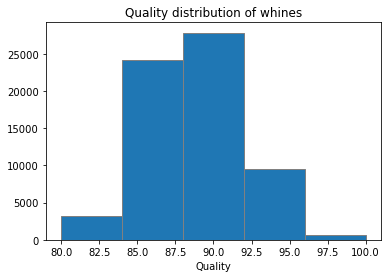

mean -  88.3147008050841
median -  88
mode -  87
standart_deviation -  3.0559100143318254
skewness -  0.16641335354074827
max points -  100
min points -  80


In [13]:
plt.title("Quality distribution of whines")
plt.xlabel("Quality")
#plt.ylabel("Count")
plt.style.use("dark_background")
plt.hist(prices["points"],bins=5,edgecolor="grey")
plt.show()

print("mean - ",statss.mean(prices["points"]))
print("median - ",statss.median(prices["points"]))
print("mode - ",statss.mode(prices["points"]))
print("standart_deviation - ",statss.stdev(prices["points"]))
print("skewness - ",prices["points"].skew())
print("max points - ",np.max(prices["points"]))
print("min points - ",np.min(prices["points"]))

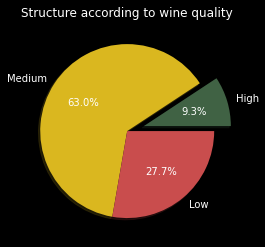

In [14]:
# Pie chart "The structure according to wine quality"

plt.title("Structure according to wine quality")
plt.style.use("dark_background")
total_labels=prices["quality_label"].value_counts()["high"]+prices["quality_label"].value_counts()["medium"]+prices["quality_label"].value_counts()["low"]
slices=[prices["quality_label"].value_counts()["high"]/total_labels,prices["quality_label"].value_counts()["medium"]/total_labels,prices["quality_label"].value_counts()["low"]/total_labels]
colors=["#406244","#dab71f","#c94d4d"]
mylabels=["High","Medium","Low"]
explode=(0.2,0,0)
plt.pie(slices,labels=mylabels,colors=colors, explode=explode,autopct="%1.1f%%",shadow=True)


plt.show()

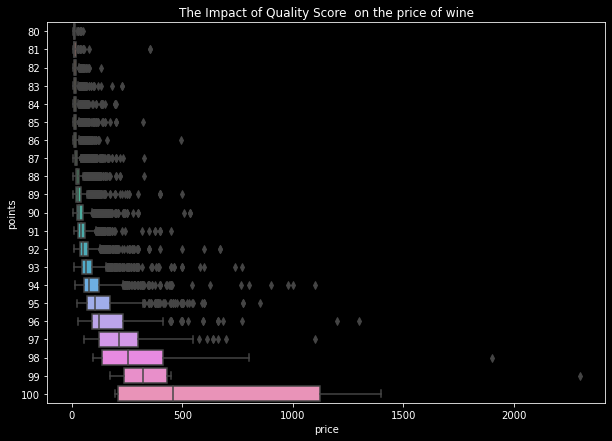

In [15]:
fig,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data=prices,x="price", y="points",orient="h")
plt.title("The Impact of Quality Score  on the price of wine")
plt.show()

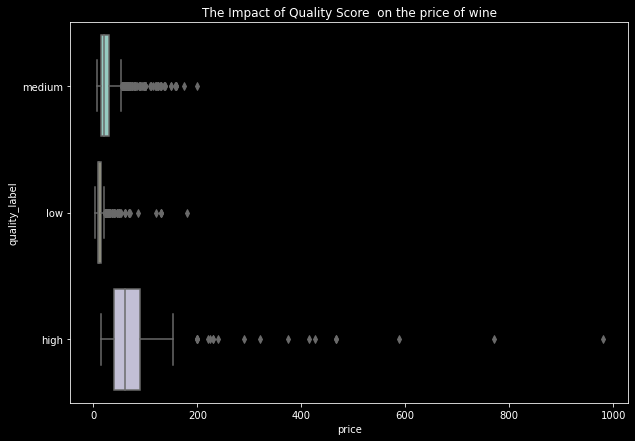

In [16]:
fig,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data=prices_P,x="price", y="quality_label",orient="h")
plt.title("The Impact of Quality Score  on the price of wine")
plt.show()

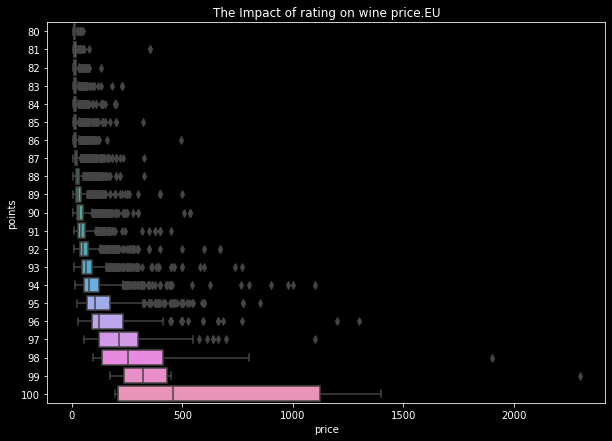

In [17]:
fig,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data=prices,x="price", y="points",orient="h")
plt.title("The Impact of rating on wine price.EU")
plt.show()

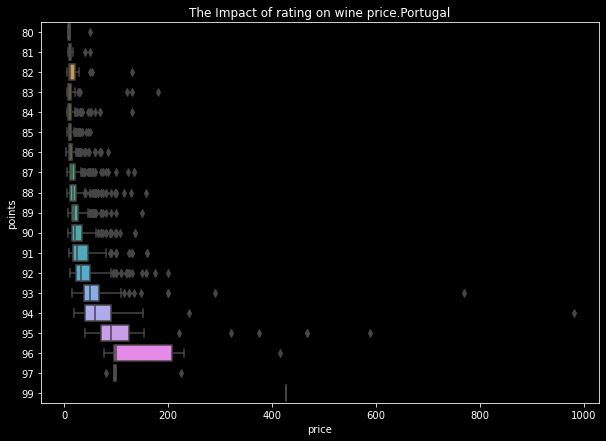

In [18]:
fig,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data=prices_P,x="price", y="points",orient="h")
plt.title("The Impact of rating on wine price.Portugal")
plt.show()

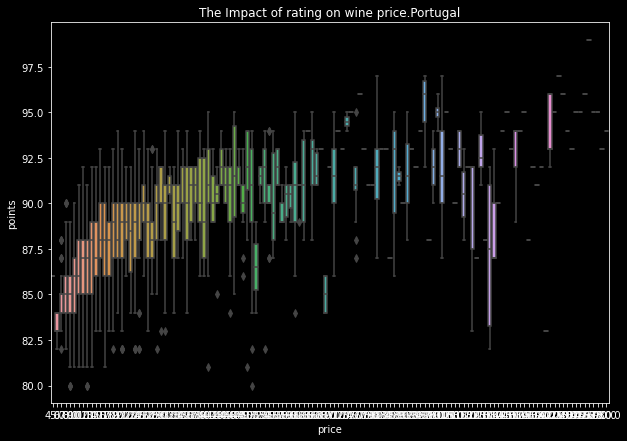

In [19]:
fig,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data=prices_P,x="price", y="points")
plt.title("The Impact of rating on wine price.Portugal")
plt.show()

In [20]:
HQ=prices_P[prices_P["quality_label"]=="high"]
MQ=prices_P[prices_P["quality_label"]=="medium"]
LQ=prices_P[prices_P["quality_label"]=="low"]

<AxesSubplot:title={'center':'Low quality'}, xlabel='price', ylabel='Count'>

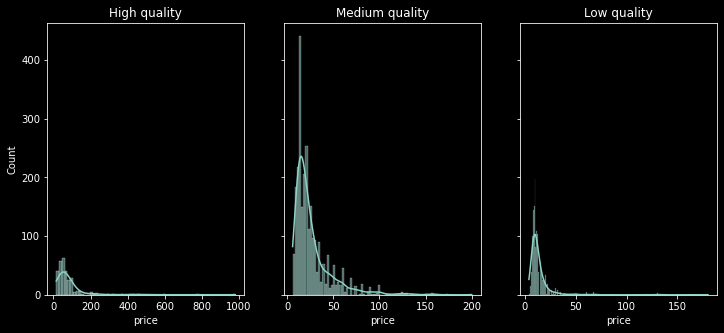

In [21]:
fig,axs=plt.subplots(1,3,sharey=True,figsize=(12,5))
axs[0].set_title("High quality")
axs[1].set_title("Medium quality")
axs[2].set_title("Low quality")
sns.histplot(data=HQ,x="price",kde=True,ax=axs[0])
sns.histplot(data=MQ,x="price",kde=True,ax=axs[1])
sns.histplot(data=LQ,x="price",kde=True,ax=axs[2])

median price High quality -  50.0


,Unnamed: 0,points,price
count,324.000000,324.000000,290.000000
mean,63546.990741,93.685185,81.527586
std,45376.375195,0.963560,97.826276
min,210.000000,93.000000,15.000000
25%,18743.750000,93.000000,40.000000
50%,57065.500000,93.000000,60.000000
75%,109320.000000,94.000000,90.000000
max,148192.000000,99.000000,980.000000


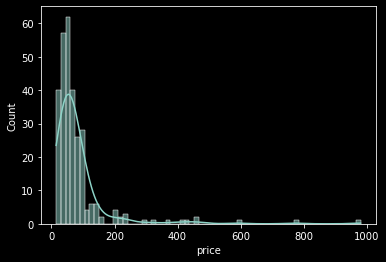

In [32]:
sns.histplot(data=HQ,x="price",kde=True)
print("median price High quality - ",statss.mode(HQ["price"]))
HQ.describe()



median price Medium quality -  15.0


,Unnamed: 0,points,price
count,3295.000000,3295.000000,2594.000000
mean,70950.632170,89.206677,26.614495
std,42091.809276,1.588729,21.115941
min,64.000000,87.000000,6.000000
25%,37515.500000,88.000000,14.000000
50%,74191.000000,89.000000,20.000000
75%,103501.000000,90.000000,30.000000
max,150791.000000,92.000000,200.000000


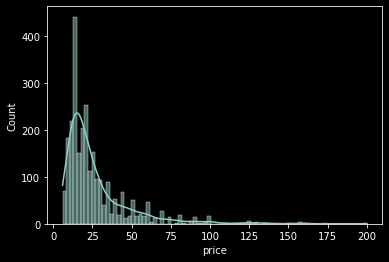

In [34]:
sns.histplot(data=MQ,x="price",kde=True)
print("median price Medium quality - ",statss.mode(MQ["price"]))
MQ.describe()

median price Low quality -  10.0


,Unnamed: 0,points,price
count,1703.000000,1703.000000,1292.000000
mean,68624.567234,84.763946,13.377709
std,42220.671737,1.205429,11.242682
min,91.000000,80.000000,4.000000
25%,33029.500000,84.000000,9.000000
50%,64533.000000,85.000000,10.000000
75%,102333.500000,86.000000,14.000000
max,149636.000000,86.000000,180.000000


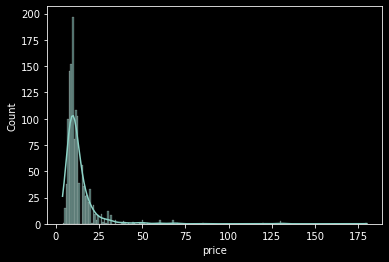

In [35]:
sns.histplot(data=LQ,x="price",kde=True)
print("median price Low quality - ",statss.mode(LQ["price"]))
LQ.describe()

In [23]:
print("median price High quality - ",statss.median(HQ["price"]))
print("median price Medium quality - ",statss.median(MQ["price"]))
print("median price LOw quality - ",statss.median(LQ["price"]))


#print("max points - ",np.max(prices["points"]))
#print("min points - ",np.min(prices["points"]))

median price High quality -  nan
median price Medium quality -  nan
median price LOw quality -  18.0


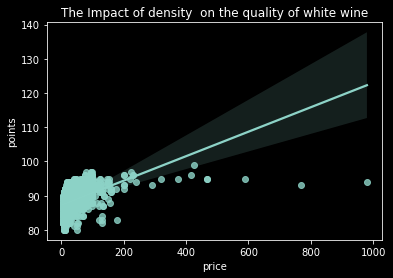

In [24]:
sns.regplot(data=prices_P,x="price", y="points")
plt.title("The Impact of density  on the quality of white wine")
plt.show()

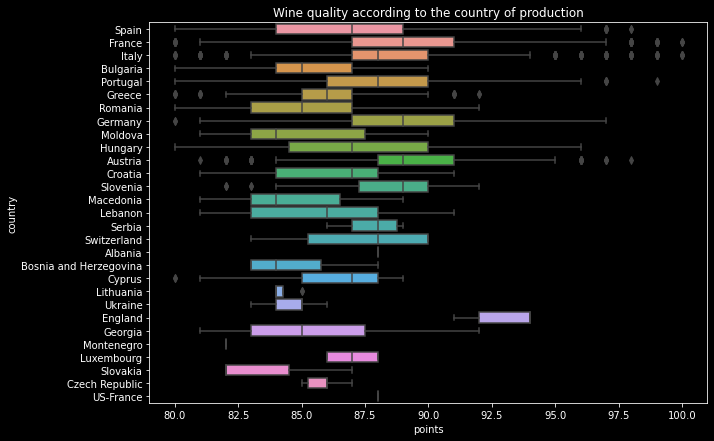

In [25]:
fig,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data=prices,x="points", y="country",orient="h")
plt.title("Wine quality according to the country of production")
plt.show()